<a href="https://colab.research.google.com/github/1272371/DN3_Classifiers_Model/blob/harmony/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA - Twitter Sentiment Classification

The data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.


**Class Description**

2 News: the tweet links to factual news about climate change.

1 Pro: the tweet supports the belief of man-made climate change.

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change.

-1 Anti: the tweet does not believe in man-made climate change Variable definitions.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [25]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [26]:
df=pd.read_csv("/content/drive/MyDrive/dataExplorer/train.csv")
df

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


https and name of the handle in the message in data cleaning so that we will be left with the actual message......Still need to be  done

In [28]:
df['count']=df['message'].str.split().str.len()
df

,sentiment,message,tweetid,count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19
1,1,It's not like we lack evidence of anthropogeni...,126103,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22
15815,2,RT @washingtonpost: How climate change could b...,17856,13
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21


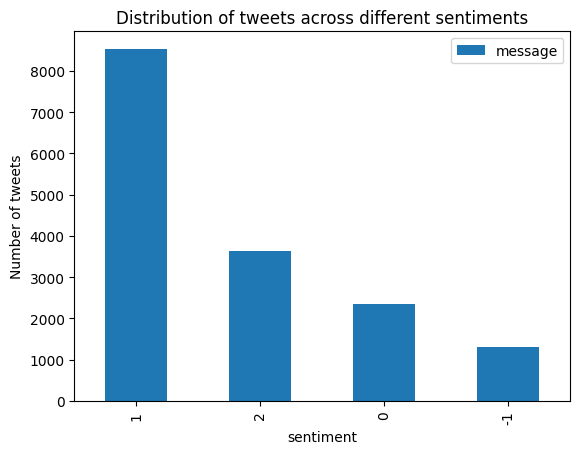

In [29]:
countv= df[['sentiment', 'message']].groupby('sentiment').count()
countv.sort_values('message', ascending=False).plot(kind='bar')
plt.title('Distribution of tweets across different sentiments')
plt.ylabel('Number of tweets')
plt.show()

**Observation:** Most tweets came from those who supports the belief of man-made climate change, followed by the tweet links to factual news about climate change . Meanwhile, least tweets does not believe in man-made climate change Variable definitions.

In [30]:
Pro=df[df['sentiment']==1]
News=df[df['sentiment']==2]
Neutral=df[df['sentiment']==0]
Anti=df[df['sentiment']==-1]

<Axes: >

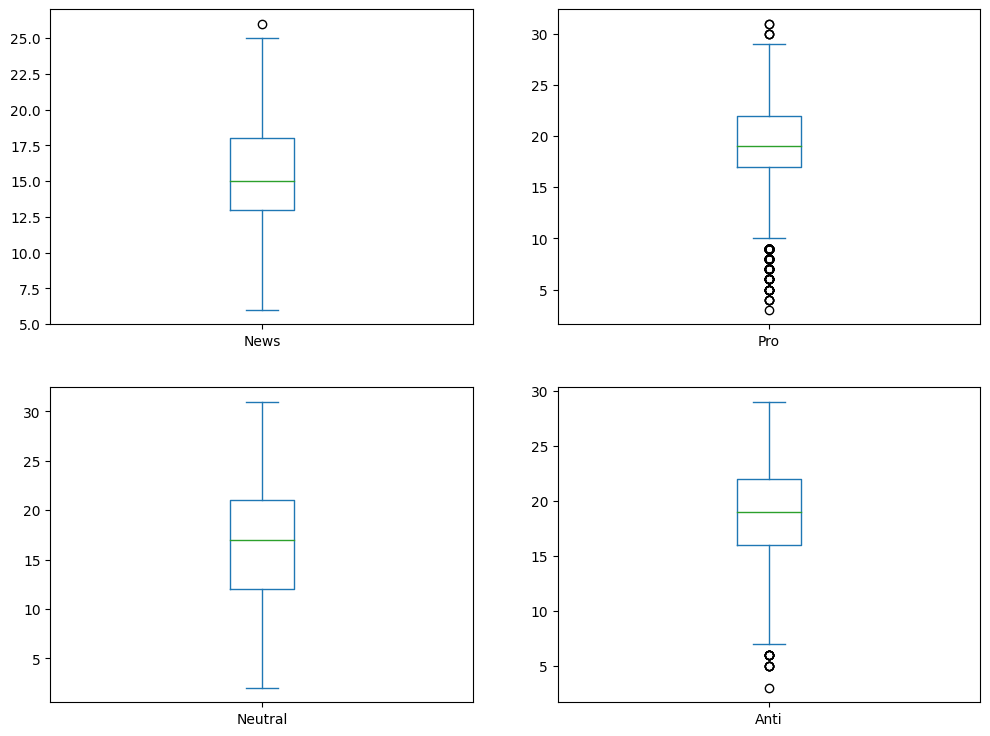

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
News['count'].plot(kind='box', ax=ax[0,0], label='News')
Pro['count'].plot(kind='box', ax=ax[0,1], label='Pro')
Neutral['count'].plot(kind='box', ax=ax[1,0], label='Neutral')
Anti['count'].plot(kind='box', ax=ax[1,1], label='Anti')

<Axes: ylabel='Density'>

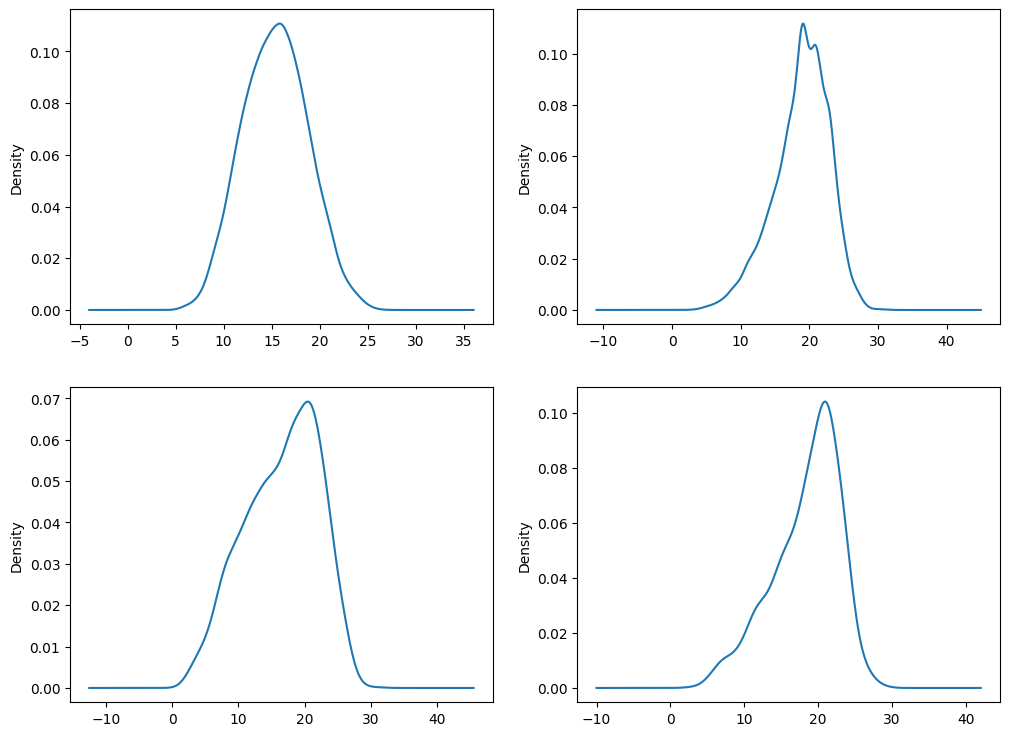

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
News['count'].plot(kind='density', ax=ax[0,0], label='News')
Pro['count'].plot(kind='density', ax=ax[0,1], label='Pro')
Neutral['count'].plot(kind='density', ax=ax[1,0], label='Neutral')
Anti['count'].plot(kind='density', ax=ax[1,1], label='Anti')

**Between box plot and density plot which one is the best? Also, which ngram_range will be the best for our project and why?**

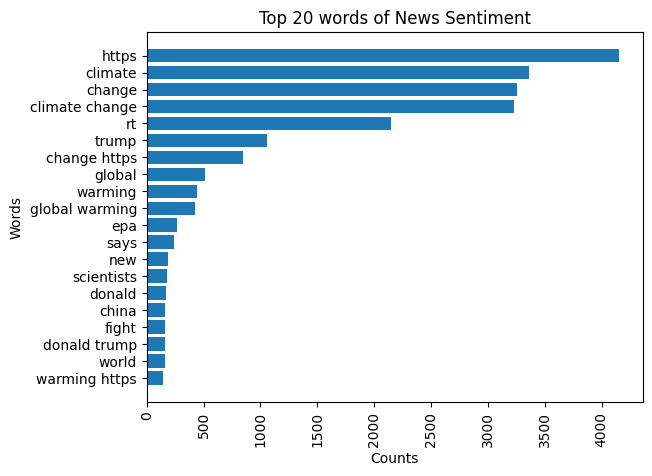

In [33]:
vect_news = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 2))
News_fit=vect_news.fit_transform(News['message'].values.astype(str))
News_Names=vect_news.get_feature_names_out()
News_counts=News_fit.toarray().sum(axis=0)


sorted_indices = News_counts.argsort()
sorted_words = [News_Names[i] for i in sorted_indices]
sorted_counts = News_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts )
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of News Sentiment')
plt.show()

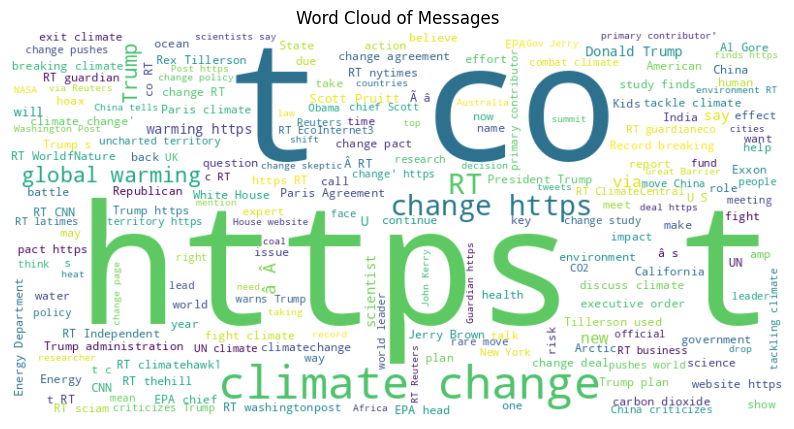

In [41]:
# Concatenate all the preprocessed messages into a single string
all_messages = ' '.join(News['message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

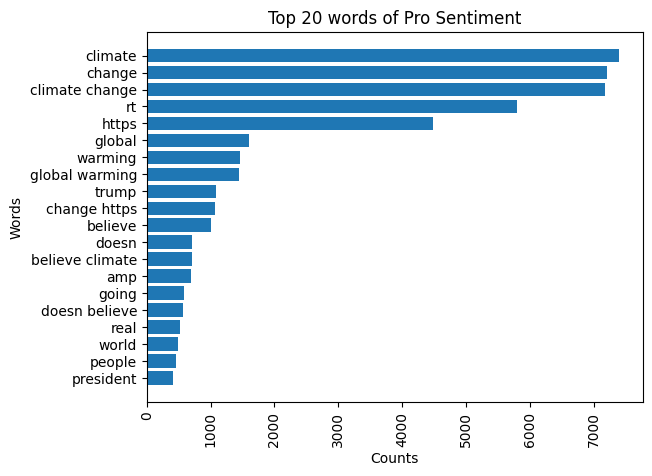

In [34]:
vect_Pro = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 2))
Pro_fit = vect_Pro.fit_transform(Pro['message'].values.astype(str))
Pro_Names=vect_Pro.get_feature_names_out()
Pro_counts=Pro_fit.toarray().sum(axis=0)

sorted_indices = Pro_counts.argsort()
sorted_words = [Pro_Names[i] for i in sorted_indices]
sorted_counts = Pro_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of Pro Sentiment')
plt.show()

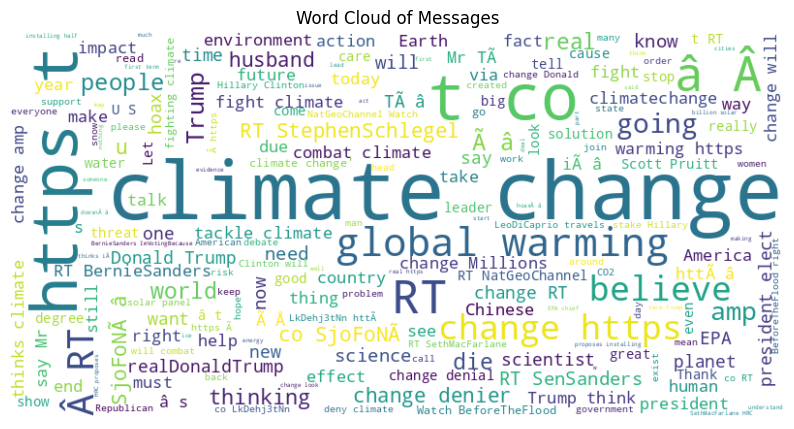

In [35]:
# Concatenate all the preprocessed messages into a single string
all_messages = ' '.join(Pro['message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

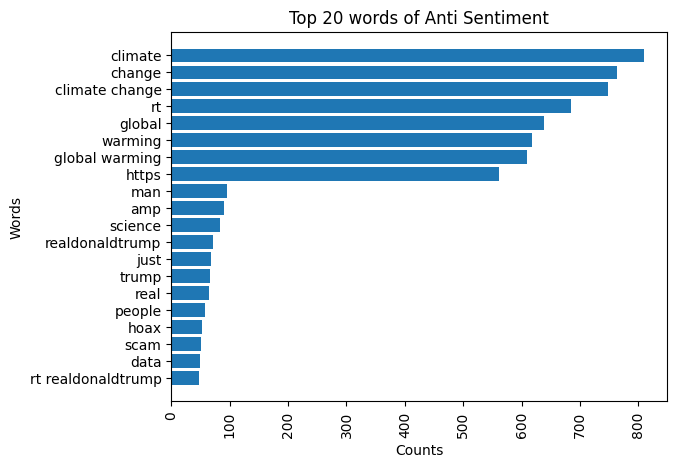

In [36]:
vect_Anti = CountVectorizer(lowercase=True, stop_words='english',  max_features=20, analyzer='word', ngram_range=(1, 2))
Anti_fit = vect_Anti.fit_transform(Anti['message'].values.astype(str))
Anti_Names=vect_Anti.get_feature_names_out()
Anti_counts=Anti_fit.toarray().sum(axis=0)

sorted_indices = Anti_counts.argsort()
sorted_words = [Anti_Names[i] for i in sorted_indices]
sorted_counts = Anti_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of Anti Sentiment')
plt.show()

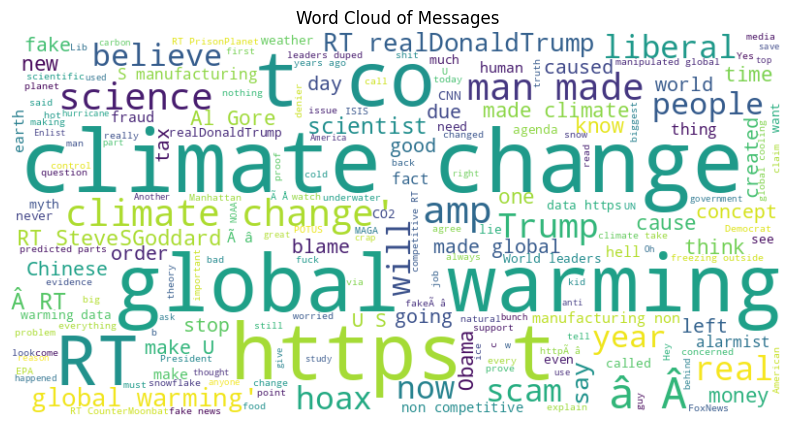

In [37]:
# Concatenate all the preprocessed messages into a single string
all_messages = ' '.join(Anti['message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

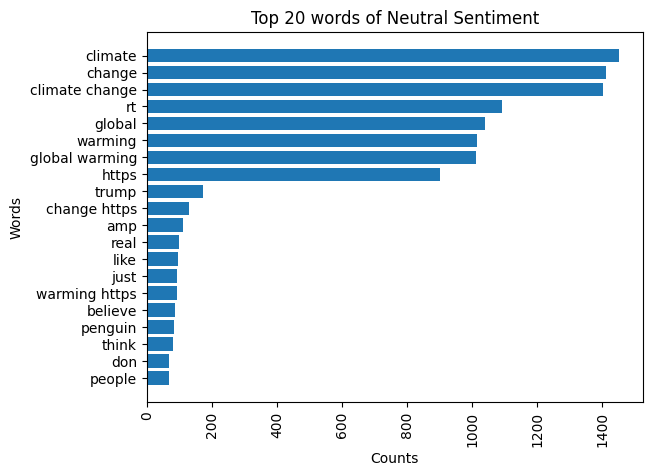

In [38]:
vect_Neutral = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 2))
Neutral_fit=vect_Neutral.fit_transform(Neutral['message'].values.astype(str))
Neutral_Names=vect_Neutral.get_feature_names_out()
Neutral_counts=Neutral_fit.toarray().sum(axis=0)

sorted_indices = Neutral_counts.argsort()
sorted_words = [Neutral_Names[i] for i in sorted_indices]
sorted_counts = Neutral_counts[sorted_indices]

plt.barh(sorted_words, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 20 words of Neutral Sentiment')
plt.show()

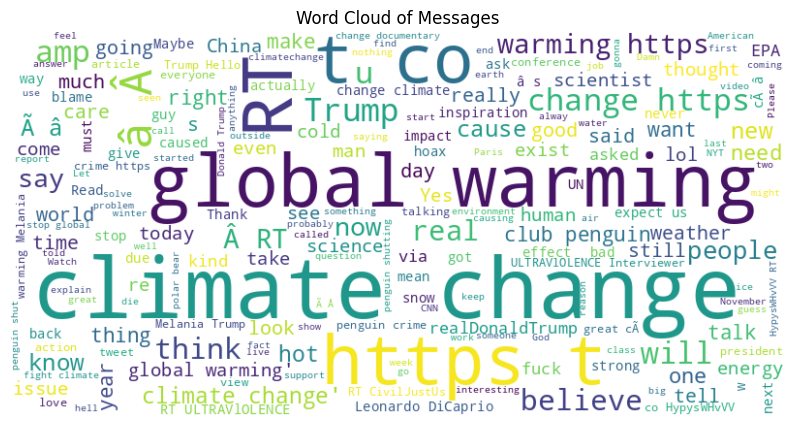

In [39]:
# Concatenate all the preprocessed messages into a single string
all_messages = ' '.join(Neutral['message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

**Important information to consider**
DANIEL SUGGESTS THAT WE USE DOWNSAMPLING BECAUSE UPSAMPLING CAUSES OVERFITTING!!!!
Also Variable selection to reduce the number of features that we have......

In [ ]:
len(Pro)/2

4265.0

**Masking Sentiments into Four classes**

In [ ]:
#Masking the Pro Sentiment
Pro=df[df['sentiment']==1]
#Masking the New Sentiment
News=df[df['sentiment']==2]
#Masking the Neutral Sentiment
Neutral=df[df['sentiment']==0]
#Masking the Anti Sentiment
Anti=df[df['sentiment']==-1]

**Upsampling the Pro sentiment:**

In [ ]:
Pro_down= resample(Pro,
                    replace=False, # sample with replacement (we need to duplicate observations)
                    n_samples=4265, # match number in minority class
                    random_state=27)

**Upsampling the News sentiment:**

In [ ]:
News_up = resample(News,
                   replace=True, # sample with replacement (we need to duplicate observations)
                   n_samples=4265, # match number in minority class
                   random_state=27)

**Upsampling the Neutral sentiment:**

In [ ]:
Neutral_upsampled = resample(Neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=4265, # match number in minority class
                          random_state=27)

**Upsampling the Anti sentiment:**

In [ ]:
Anti_upsampled = resample(Anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=4265, # match number in minority class
                          random_state=27)

**Joining resampled sentiments**

In [ ]:
X = pd.concat([Anti_upsampled, Neutral_upsampled, News_up, Pro_down])

In [ ]:
y=X['sentiment']

**Natural Langauge Processing using Countvectorizer**

In [ ]:
#Building a CountVectorizer
vect_Pro = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 2))
#Fitting and Transforming the data
X= vect_Pro.fit_transform(X['message'].values.astype(str))

In [ ]:
import pickle
pickle.dump(vect_Pro, open( "vect_Pro.pkl", "wb" ))

**Feature selection**



In [ ]:
# # Import the feature selector module
# from sklearn import feature_selection
# from sklearn.feature_selection import f_classif

# # Set up selector, choosing score function and number of features to retain
# selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=50000)

# # Transform (i.e.: run selection on) the training data
# X= selector_kbest.fit_transform(X, y)

How many features do we really need and why?

In [ ]:
X.shape

(17060, 89155)

**Spliting the data**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=42)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

**LINEAR REGRESSION MODEL**

In [ ]:
#Building the logistic Regression Model
lr=LogisticRegression()
#Fitting Logistics regression model
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predicting on the testing data
test_preds=lr.predict(X_test)
#Predicting on the training data
train_preds=lr.predict(X_train)

In [ ]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3414
           0       1.00      1.00      1.00      3404
           1       1.00      1.00      1.00      3441
           2       1.00      1.00      1.00      3389

    accuracy                           1.00     13648
   macro avg       1.00      1.00      1.00     13648
weighted avg       1.00      1.00      1.00     13648



In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       851
           0       0.86      0.92      0.89       861
           1       0.85      0.71      0.77       824
           2       0.86      0.91      0.89       876

    accuracy                           0.88      3412
   macro avg       0.88      0.88      0.87      3412
weighted avg       0.88      0.88      0.88      3412



**DECISION TREE CLASSIFIER**

In [ ]:
#Building the  Decision Tree Classifier Model
dtc=DecisionTreeClassifier(max_depth=7)
#Fitting Decision Tree  Classifier model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
#Predicting on the testing data
test_preds=dtc.predict(X_test)
#Predicting on the training data
train_preds=dtc.predict(X_train)

In [ ]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       0.59      0.37      0.46      3414
           0       0.50      0.51      0.51      3404
           1       0.50      0.38      0.43      3441
           2       0.52      0.81      0.63      3389

    accuracy                           0.52     13648
   macro avg       0.53      0.52      0.51     13648
weighted avg       0.53      0.52      0.51     13648



In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.54      0.33      0.41       851
           0       0.49      0.50      0.50       861
           1       0.45      0.36      0.40       824
           2       0.53      0.80      0.64       876

    accuracy                           0.50      3412
   macro avg       0.50      0.50      0.49      3412
weighted avg       0.50      0.50      0.49      3412



**RANDOM FOREST CLASSIFIER**

In [ ]:
#Building the logistic Random Forest Model
rfc=RandomForestClassifier(max_depth=7, n_estimators=100)
#Fitting Logistics Random Forest model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [ ]:
#Predicting on the testing data
test_preds=rfc.predict(X_test)
#Predicting on the training data
train_preds=rfc.predict(X_train)

In [ ]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

          -1       0.86      0.55      0.67      3414
           0       0.57      0.62      0.59      3404
           1       0.60      0.49      0.54      3441
           2       0.59      0.87      0.70      3389

    accuracy                           0.63     13648
   macro avg       0.65      0.63      0.63     13648
weighted avg       0.65      0.63      0.63     13648



In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

          -1       0.81      0.53      0.64       851
           0       0.56      0.61      0.58       861
           1       0.54      0.44      0.48       824
           2       0.59      0.84      0.69       876

    accuracy                           0.61      3412
   macro avg       0.62      0.60      0.60      3412
weighted avg       0.63      0.61      0.60      3412



**KNN Classifier**

In [ ]:
n_neighbors = 100

#Building the Model
knn = KNeighborsClassifier(n_neighbors)
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
# Get predictions on the test set
y_hat = knn.predict(X_test)
# Calculate the loss
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.81      0.02      0.05       851
           0       0.26      1.00      0.41       861
           1       1.00      0.07      0.13       824
           2       0.00      0.00      0.00       876

    accuracy                           0.27      3412
   macro avg       0.52      0.27      0.15      3412
weighted avg       0.51      0.27      0.15      3412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

          -1       0.78      0.02      0.05      3414
           0       0.25      1.00      0.41      3404
           1       1.00      0.06      0.12      3441
           2       1.00      0.00      0.00      3389

    accuracy                           0.27     13648
   macro avg       0.76      0.27      0.14     13648
weighted avg       0.76      0.27      0.14     13648



**Support Vector Machine**

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       851
           0       0.87      0.87      0.87       861
           1       0.79      0.74      0.76       824
           2       0.84      0.90      0.87       876

    accuracy                           0.87      3412
   macro avg       0.87      0.86      0.86      3412
weighted avg       0.87      0.87      0.87      3412



In [ ]:
print(classification_report(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3414
           0       0.98      0.99      0.98      3404
           1       0.99      0.97      0.98      3441
           2       0.98      0.99      0.99      3389

    accuracy                           0.99     13648
   macro avg       0.99      0.99      0.99     13648
weighted avg       0.99      0.99      0.99     13648



In [ ]:
import pickle
pickle.dump(svc, open( "svc.pkl", "wb" ))

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

Besides accuracy, f1 score, precision and recall, also consider the training time????maybe ###un_time = %timeit -q -o knn.fit(X_train, y_train)

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic